In [117]:
import pandas as pd 
data_link = '/Users/user/Desktop/Business_intelligence_in_Python/ebayAuctions.csv'
ebay_df = pd.read_csv(data_link,encoding = 'unicode_escape')

In [118]:
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
Category        1972 non-null object
currency        1972 non-null object
sellerRating    1972 non-null int64
Duration        1972 non-null int64
endDay          1972 non-null object
ClosePrice      1972 non-null float64
OpenPrice       1972 non-null float64
Competitive?    1972 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 123.3+ KB


In [119]:
ebay_df.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [120]:
ebay_df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [121]:
#create dummy variables 
category_dummy = pd.get_dummies(ebay_df['Category'],prefix='Category_')
currency_dummy = pd.get_dummies(ebay_df['currency'],prefix='currency_')
endDay_dummy = pd.get_dummies(ebay_df['endDay'],prefix='endDay_')

In [122]:
ebay_df = pd.concat([ebay_df,category_dummy,currency_dummy,endDay_dummy],axis=1)

In [123]:
ebay_df = ebay_df.drop(columns=['Category','currency','endDay'])

In [124]:
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 33 columns):
sellerRating                      1972 non-null int64
Duration                          1972 non-null int64
ClosePrice                        1972 non-null float64
OpenPrice                         1972 non-null float64
Competitive?                      1972 non-null int64
Category__Antique/Art/Craft       1972 non-null uint8
Category__Automotive              1972 non-null uint8
Category__Books                   1972 non-null uint8
Category__Business/Industrial     1972 non-null uint8
Category__Clothing/Accessories    1972 non-null uint8
Category__Coins/Stamps            1972 non-null uint8
Category__Collectibles            1972 non-null uint8
Category__Computer                1972 non-null uint8
Category__Electronics             1972 non-null uint8
Category__EverythingElse          1972 non-null uint8
Category__Health/Beauty           1972 non-null uint8
Category__Home/Garden    

In [125]:
# partition the data 
X = ebay_df.drop(columns = 'Competitive?')
y = ebay_df['Competitive?']

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=0.4,random_state=12345)

In [127]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs',max_iter = 10000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
y_pred = logreg.predict(X_test)

In [186]:
y_proba = logreg.predict_proba(X_test)

In [187]:
#confusion matrix 
from sklearn import metrics
cmatrix = metrics.confusion_matrix(y_test,y_pred)
cmatrix

array([[422, 123],
       [161, 478]])

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       545
           1       0.80      0.75      0.77       639

    accuracy                           0.76      1184
   macro avg       0.76      0.76      0.76      1184
weighted avg       0.76      0.76      0.76      1184



In [189]:
import numpy as np
from sklearn.metrics import accuracy_score
accT = []
list_cutoff = np.arange(0.0,1.1,0.1)
for i in list_cutoff:
    result  = logreg.predict_proba(X_test)[:,1]
    y_prediction = [1 if r>i else 0 for r in result]
    accT.append(accuracy_score(y_test,y_prediction))

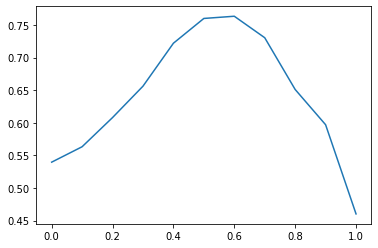

In [190]:
# cutoff-accuracy 
import matplotlib.pyplot as plt
plt.plot(list_cutoff,accT)

In [191]:
result_df = pd.DataFrame({'predict':y_pred,'actual':y_test.ravel()})

In [192]:
result_df.head()

,predict,actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


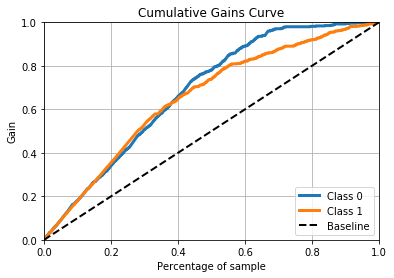

In [193]:
# lift chart 
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,y_proba)

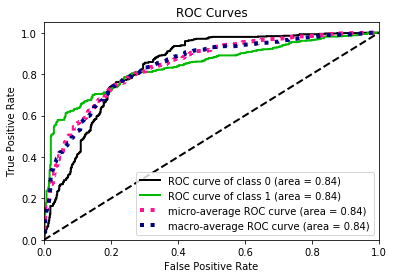

In [198]:
# ROC Chart 
skplt.metrics.plot_roc(y_test,y_proba)

In [202]:
# auc score 
auc = metrics.roc_auc_score(y_test, y_proba[::,1])
print('auc',auc)

auc 0.8394165195043861
